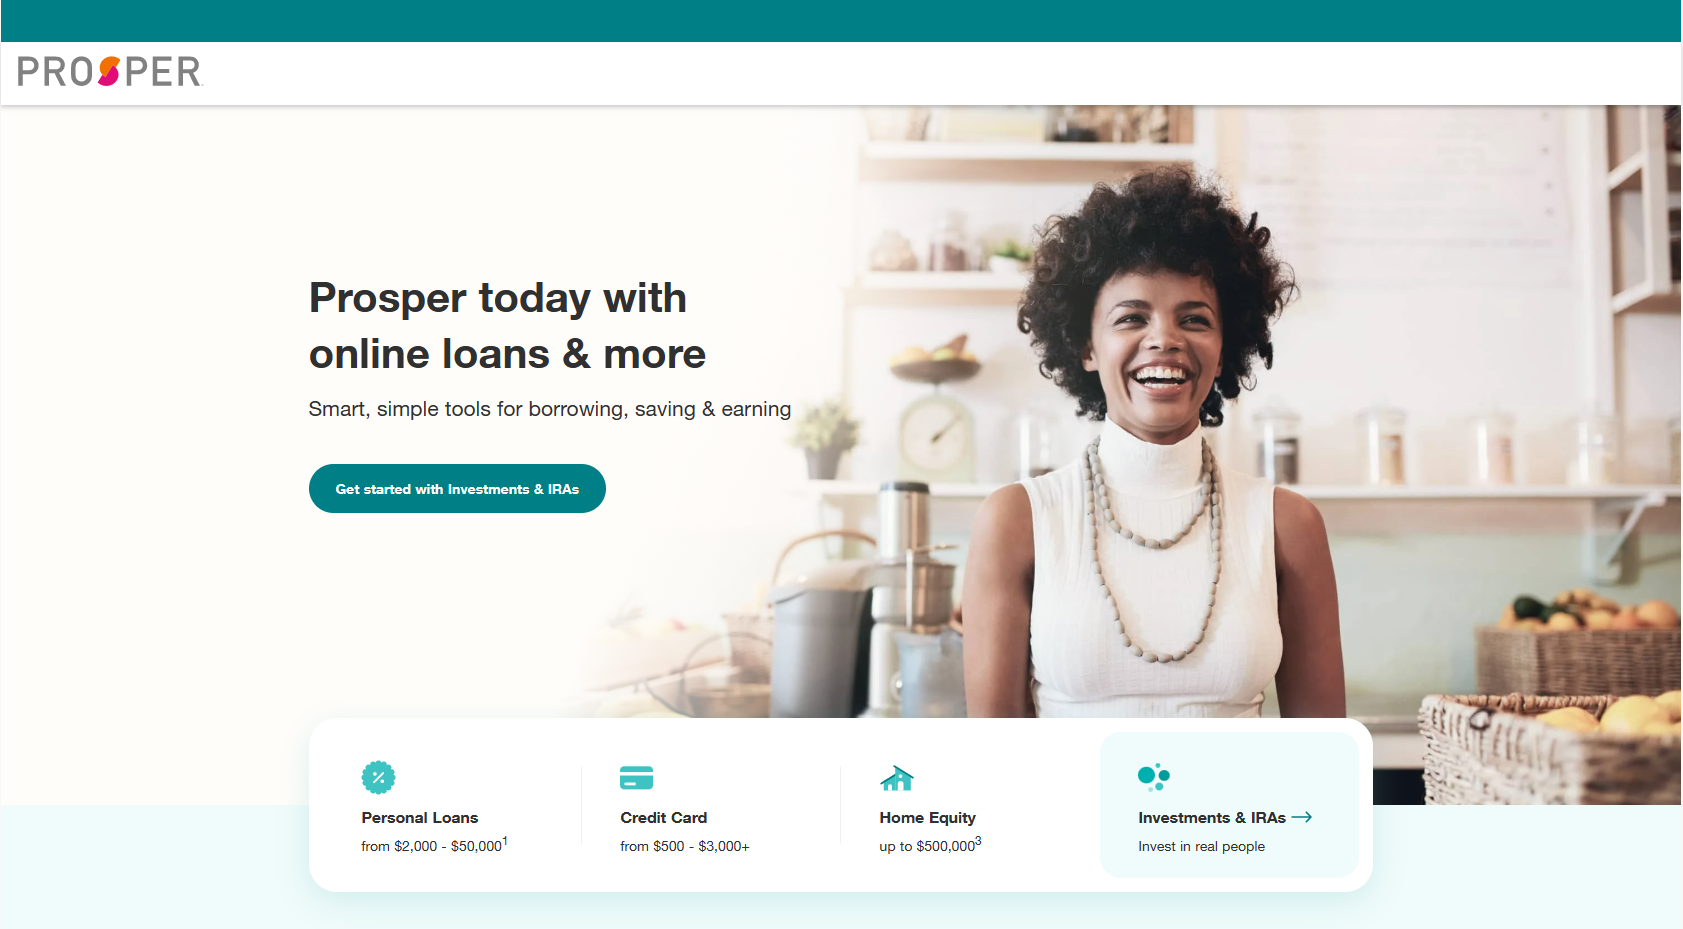

# Python Project - Exploratory Data Analysis: Prosper Loan
## by Patrick Ugheoke Sebastine

## Introduction
>  This notebook will document my attempt to study a fascinating dataset from the Prosper loan. Despite the numerous questions that can be raised regarding the data, my focus will be solely on the exploratory data analysis (EDA).

>The dataset provided contains information on loan listings from the Prosper lending platform. The information provided in the dataset includes various details on the loans such as the loan amount, interest rate, credit rating, loan status, and various demographic details of the borrowers such as their employment status, occupation, state, and credit score. Some of the variables are only relevant for loans originated after July 2009 and may not be applicable for all loans in the dataset. This dataset can be used for exploratory analysis to understand the **loan characteristics and the factors affecting loan performance**.

>  The primary source of data for this project is the "Python Project 5.xlsx" file. The file consists of two worksheets: "prosperLoanData" which holds the dataset and "Variable description" that provides information on the data columns.  
>  The "prosperLoanData" worksheet has been saved as a CSV file named "Prosper Loan.csv" and will be used for the EDA.

>  My tasks include the following steps:

> - Download the 'Python Project 5' xlsx file from the class files page. It contains two sheets: the dataset for the project and a description of the variables in the dataset.
> -  Get the 'Prosper Loan' csv file from the class files page. The csv format of the project dataset.
> -  Download the Jupyter Notebook template to use for your project.
> -  Read in your csv file, assess and clean your dataframe and create visualizations following the notebook template.
> -  Endeavor to follow the tips, suggestions and overall format of the template. 
> -  Convert your notebook to a PDF or HTML file for submission.

## Preliminary Wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load in the dataset into a Pandas dataframe
df = pd.read_csv('Prosper Loan.csv')

In [3]:
# Interogating the data in the dataset
df.info

<bound method DataFrame.info of                      ListingKey  ListingNumber ListingCreationDate  \
0       1021339766868145413AB3B         193129             09:29.3   
1       10273602499503308B223C1        1209647             28:07.9   
2       0EE9337825851032864889A          81716             00:47.1   
3       0EF5356002482715299901A         658116             02:35.0   
4       0F023589499656230C5E3E2         909464             38:39.1   
...                         ...            ...                 ...   
113932  E6D9357655724827169606C         753087             55:02.7   
113933  E6DB353036033497292EE43         537216             42:55.3   
113934  E6E13596170052029692BB1        1069178             49:12.7   
113935  E6EB3531504622671970D9E         539056             18:26.6   
113936  E6ED3600409833199F711B7        1140093             27:37.7   

       CreditGrade  Term              LoanStatus        ClosedDate  \
0                C    36               Completed  14/08/2

In [4]:
# Obtaining information about the Data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Obtaining descriptive statistics summary of the data in the dataset.
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The dataset consists of 113,937 loan records, each with 81 different variables. I will focus on a select few of these variables to understand the loan characteristics and the factors affecting loan performance. These variables provide information about the loans and the borrowers.

### What is/are the main feature(s) of interest in your dataset?

> These below variables shall make up my features of interest in the dataset.
They are relevant for EDA as they will provide a comprehensive understanding of the loan and borrower characteristics, which can be used to analyze loan performance and identify potential risk factors.
>-  Term
>-  LoanStatus
>-  BorrowerAPR
>-  BorrowerRate
>-  LenderYield
>-  EstimatedEffectiveYield (for loans originated after July 2009)
>-  ProsperRating (numeric)
>-  ProsperRating (Alpha)
>-  ProsperScore (for loans originated after July 2009)
>-  ListingCategory
>-  BorrowerState
>-  Occupation
>-  Employment Status 
>-  Employment Status Duration
>-  Home ownership status
>-  Credit Score Range Lower
>-  Credit Score Range Upper
>-  Current Delinquencies
>-  Amount Delinquent
>-  Delinquencies Last 7 years
>-  Public Records Last 10 years
>-  Public Records Last 12 months
>-  Debt-to-Income Ratio (DTI)
>-  Loan Current Days Delinquent
>-  Loan Original Amount


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following variables are relevant for Exploratory Data Analysis (EDA) because they provide a wealth of information about the loan and the borrower's financial status:

>1. Term: The length of the loan can provide insights into loan repayment behavior and also help determine the relationship between loan duration and loan performance.

>2. LoanStatus: It provides information on the current status of the loan and is a crucial variable in determining loan performance.

>3. BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield: These variables provide information on the interest rates associated with the loan and can help determine the relationship between interest rates and loan performance.

>4. ProsperRating (numeric), ProsperRating (Alpha), ProsperScore: These variables provide a risk assessment of the loan and can be used to understand the relationship between loan risk and loan performance.

>5. ListingCategory: This variable provides information on the purpose of the loan and can be used to understand the most common reasons for taking out loans and the relationship between loan purpose and loan performance.

>6. BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner: These variables provide information on the borrower's demographic and employment status and can be used to understand the relationship between borrower characteristics and loan performance.

>7. CreditScoreRangeLower, CreditScoreRangeUpper: These variables provide information on the borrower's credit score and can be used to understand the relationship between credit score and loan performance.

>8. CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months: These variables provide information on the borrower's past payment behavior and can be used to understand the relationship between borrower's credit history and loan performance.

>9. DebtToIncomeRatio: This is the ratio of a borrower's total recurring debt payments to their gross monthly income. A high DTI can indicate that a borrower has too much debt relative to their income, making them a higher risk for loan default.

>10. LoanCurrentDaysDelinquent: This is the number of days a loan is past due. A high number of delinquent days can indicate a higher risk of loan default.

>11. LoanOriginalAmount: This is the amount of the loan that was initially disbursed to the borrower. Loan original amount may be indicative of a borrower's overall financial situation.

In [7]:
# Make all the column headers lowercase 
df.columns = df.columns.str.lower()

In [8]:
# Replace all spaces, (, and ) in the column headers 
df.columns = df.columns.str.replace(" ", "").str.replace("(", "_",).str.replace(")", "")

In [9]:
# Replace TRUE with Home Owner and FALSE with Tenant in the isborrowerhomeowner headers 
df['isborrowerhomeowner'] = df['isborrowerhomeowner'].map({True: 'Home Owner', False: 'Tenant'})

In [10]:
# Displaying all the columns in the datast so the columns in my features can be easily identified
df.columns

Index(['listingkey', 'listingnumber', 'listingcreationdate', 'creditgrade',
       'term', 'loanstatus', 'closeddate', 'borrowerapr', 'borrowerrate',
       'lenderyield', 'estimatedeffectiveyield', 'estimatedloss',
       'estimatedreturn', 'prosperrating_numeric', 'prosperrating_alpha',
       'prosperscore', 'listingcategory_numeric', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'currentlyingroup', 'groupkey',
       'datecreditpulled', 'creditscorerangelower', 'creditscorerangeupper',
       'firstrecordedcreditline', 'currentcreditlines', 'opencreditlines',
       'totalcreditlinespast7years', 'openrevolvingaccounts',
       'openrevolvingmonthlypayment', 'inquirieslast6months', 'totalinquiries',
       'currentdelinquencies', 'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availableban

In [11]:
my_features  = ['term', 'loanstatus', 'borrowerapr', 'borrowerrate', 'lenderyield', 'estimatedeffectiveyield', 'prosperrating_numeric', 'prosperrating_alpha', 'prosperscore', 'listingcategory_numeric', 'borrowerstate', 'occupation', 'employmentstatus', 'employmentstatusduration', 'isborrowerhomeowner', 'creditscorerangelower', 'creditscorerangeupper', 'currentdelinquencies', 'amountdelinquent', 'delinquencieslast7years', 'publicrecordslast10years', 'publicrecordslast12months', 'debttoincomeratio', 'loancurrentdaysdelinquent', 'loanoriginalamount']
df = df[my_features]

In [12]:
df.head()

,term,loanstatus,borrowerapr,borrowerrate,lenderyield,estimatedeffectiveyield,prosperrating_numeric,prosperrating_alpha,prosperscore,listingcategory_numeric,...,creditscorerangelower,creditscorerangeupper,currentdelinquencies,amountdelinquent,delinquencieslast7years,publicrecordslast10years,publicrecordslast12months,debttoincomeratio,loancurrentdaysdelinquent,loanoriginalamount
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,0,...,640.0,659.0,2.0,472.0,4.0,0.0,0.0,0.17,0,9425
1,36,Current,0.12016,0.0920,0.0820,0.07960,6.0,A,7.0,2,...,680.0,699.0,0.0,0.0,0.0,1.0,0.0,0.18,0,10000
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,0,...,480.0,499.0,1.0,NaN,0.0,0.0,NaN,0.06,0,3001
3,36,Current,0.12528,0.0974,0.0874,0.08490,6.0,A,9.0,16,...,800.0,819.0,4.0,10056.0,14.0,0.0,0.0,0.15,0,10000
4,36,Current,0.24614,0.2085,0.1985,0.18316,3.0,D,4.0,2,...,680.0,699.0,0.0,0.0,0.0,0.0,0.0,0.26,0,15000


In [13]:
# Interogating descriptive statistics summary of the data in my featured columns.
df.describe()

,term,borrowerapr,borrowerrate,lenderyield,estimatedeffectiveyield,prosperrating_numeric,prosperscore,listingcategory_numeric,employmentstatusduration,creditscorerangelower,creditscorerangeupper,currentdelinquencies,amountdelinquent,delinquencieslast7years,publicrecordslast10years,publicrecordslast12months,debttoincomeratio,loancurrentdaysdelinquent,loanoriginalamount
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,105383.000000,113937.000000,113937.00000
mean,40.830248,0.218828,0.192764,0.182701,0.168661,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,0.592052,984.507059,4.154984,0.312646,0.015094,0.275947,152.816539,8337.01385
std,10.436212,0.080364,0.074818,0.074516,0.068467,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,1.978707,7158.270157,10.160216,0.727868,0.154092,0.551759,466.320254,6245.80058
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.00000
25%,36.000000,0.156290,0.134000,0.124200,0.115670,3.000000,4.000000,1.000000,26.000000,660.000000,679.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,4000.00000
50%,36.000000,0.209760,0.184000,0.173000,0.161500,4.000000,6.000000,1.000000,67.000000,680.000000,699.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.000000,6500.00000
75%,36.000000,0.283810,0.250000,0.240000,0.224300,5.000000,8.000000,3.000000,137.000000,720.000000,739.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.320000,0.000000,12000.00000
max,60.000000,0.512290,0.497500,0.492500,0.319900,7.000000,11.000000,20.000000,755.000000,880.000000,899.000000,83.000000,463881.000000,99.000000,38.000000,20.000000,10.010000,2704.000000,35000.00000


>  **Quantitative variables:**

>-  BorrowerAPR
>-  BorrowerRate
>-  LenderYield
>-  EstimatedEffectiveYield (for loans originated after July 2009)
>-  Credit Score Range Lower
>-  Credit Score Range Upper
>-  Current Delinquencies
>-  Amount Delinquent
>-  Delinquencies Last 7 years
>-  Public Records Last 10 years
>-  Public Records Last 12 months
>-  Debt-to-Income Ratio (DTI)
>-  Loan Current Days Delinquent
>-  Loan Original Amount

>  **Categorical variables:**

>-  Term
>-  LoanStatus
>-  ProsperRating (numeric)
>-  ProsperRating (Alpha)
>-  ProsperScore (for loans originated after July 2009)
>-  ListingCategory
>-  BorrowerState
>-  Occupation
>-  Status of Employment
>-  Employment of Employment Duration
>-  Home ownership status

## Univariate Exploration

Text(0, 0.5, 'Count')

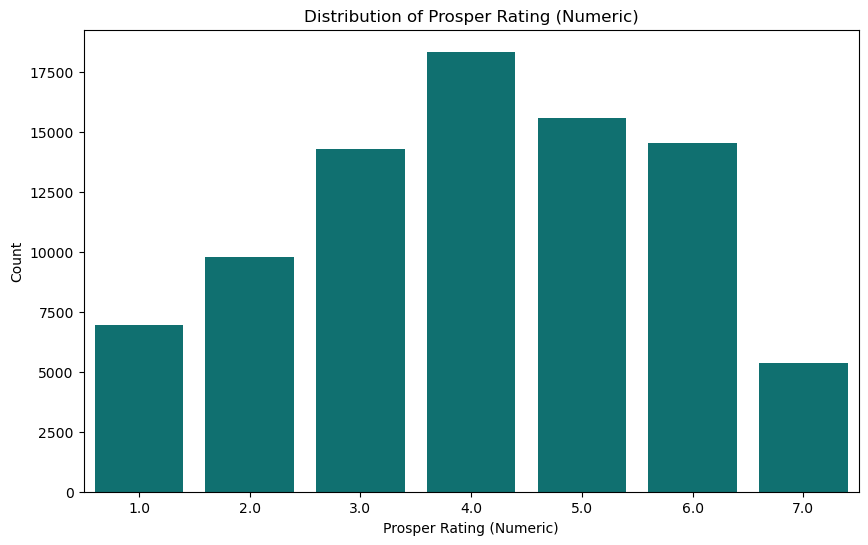

In [14]:
# Bar chart of the Prosper Rating (Numeric)
plt.figure(figsize = [10, 6])
sns.countplot(x='prosperrating_numeric', data=df, color='#008080')
plt.title("Distribution of Prosper Rating (Numeric)")
plt.xlabel("Prosper Rating (Numeric)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

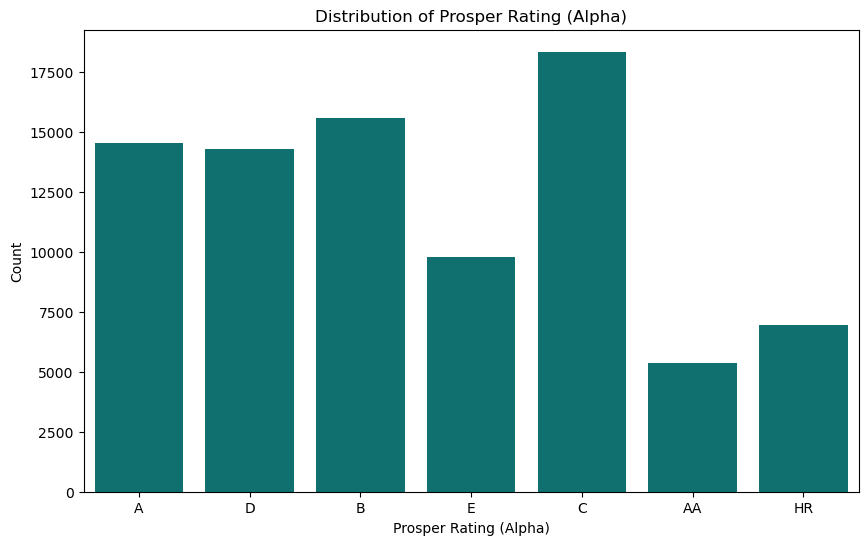

In [15]:
# Bar chart of the Prosper Rating (Alpha)
plt.figure(figsize = [10, 6])
sns.countplot(x='prosperrating_alpha', data=df, color='#008080')
plt.title("Distribution of Prosper Rating (Alpha)")
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Count")

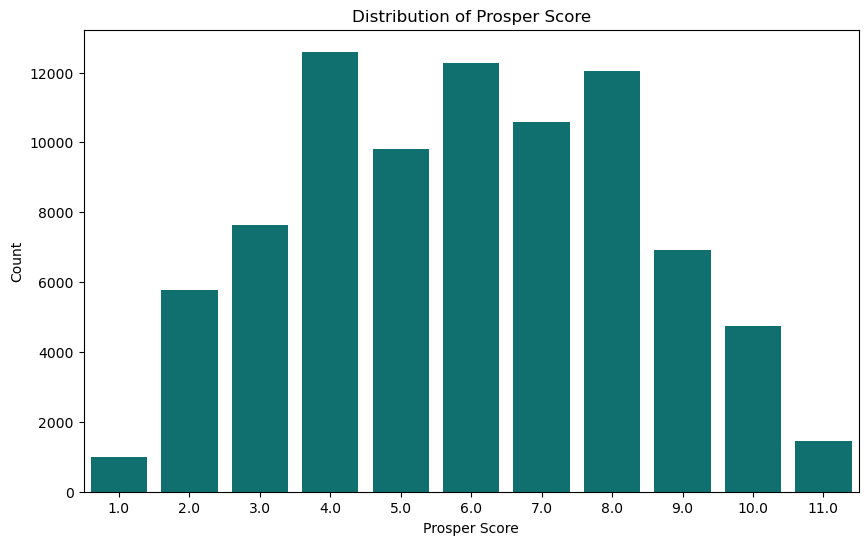

In [16]:
# Bar chart of the Prosper Score
plt.figure(figsize = [10, 6])
sns.countplot(x='prosperscore', data=df, color='#008080')
plt.title("Distribution of Prosper Score")
plt.xlabel("Prosper Score")
plt.ylabel("Count");

The bar charts shows the distribution of the Prosper Rating (Numeric and Alpha), Prosper Score columns in the data. The chart indicates that the majority of the loans have a rating of 4 (Numeric and Prosper Score) and C (Alpha). 

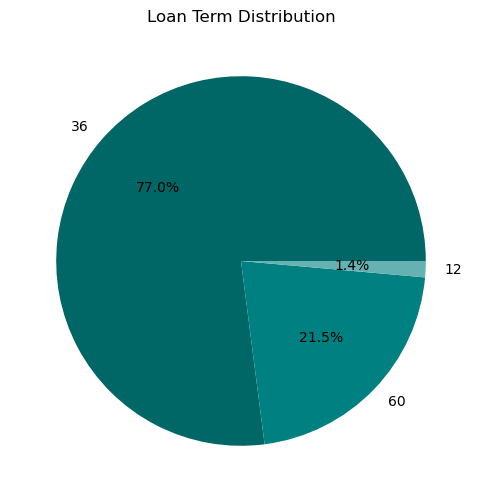

In [17]:
# Pie chart of the loan term 
plt.figure(figsize = [10, 6])
colors = ['#006666','#008080','#66b2b2']
df['term'].value_counts().plot.pie(colors=colors,autopct='%1.1f%%')
plt.title("Loan Term Distribution")
plt.ylabel("");

The pie chart shows the distribution of the Loan Term. It indicates that 77% of the loans have a term of 36 months

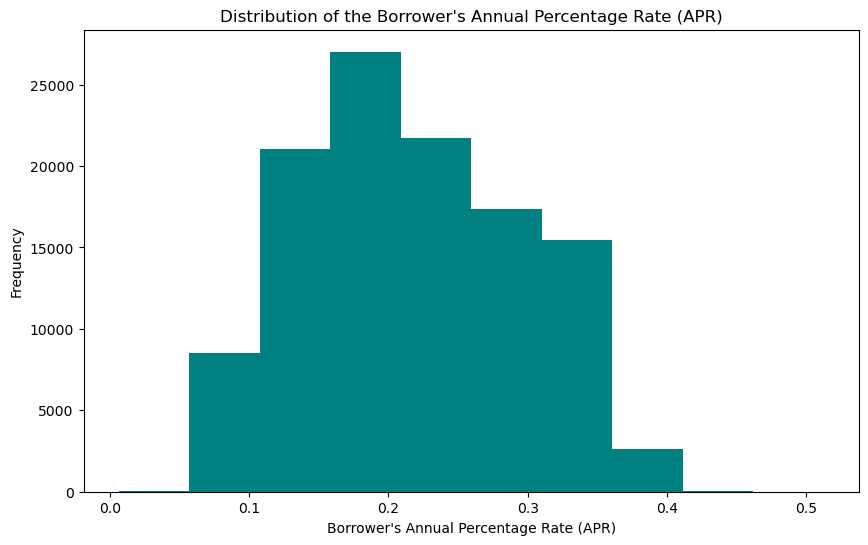

In [18]:
# Histogram of the Borrower's Annual Percentage Rate (APR) for the loan
plt.figure(figsize = [10, 6])
df['borrowerapr'].plot.hist(color='#008080')
plt.title("Distribution of the Borrower's Annual Percentage Rate (APR)")
plt.xlabel("Borrower's Annual Percentage Rate (APR)")
plt.ylabel("Frequency");

The histogram shows the distribution of the Borrower's Annual Percentage Rate (APR). It shows that the majority of the loans have a borrower APR of 0.2. The histogram is slightly skewed to the right which indicates it is positively skewed.

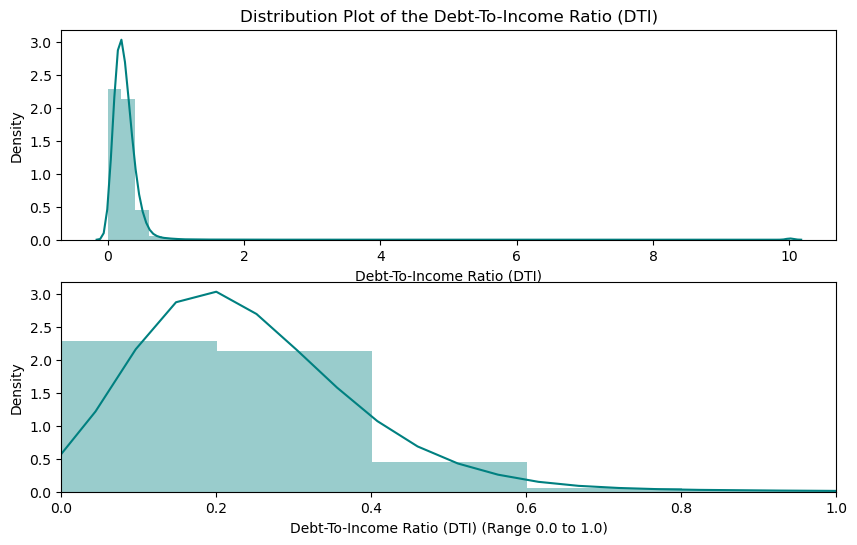

In [19]:
# Distribution plot of the Debt-To-Income Ratio (DTI)
plt.figure(figsize = [10, 6])

plt.subplot(2,1,1)
sns.distplot(df['debttoincomeratio'], color='#008080')
plt.xlim()
plt.title("Distribution Plot of the Debt-To-Income Ratio (DTI)")
plt.xlabel("Debt-To-Income Ratio (DTI)")
plt.ylabel("Density")

plt.subplot(2,1,2)
sns.distplot(df['debttoincomeratio'], color='#008080')
plt.xlim(0,1)
plt.xlabel("Debt-To-Income Ratio (DTI) (Range 0.0 to 1.0)")
plt.ylabel("Density");


The distribution plot shows the debt-to-income ratio with majority of the loans having a debt-to-income ratio of around 0.2. However, there are also some loans with debt-to-income ratios as high as 1, which suggests that some borrowers have a very high financial burden.

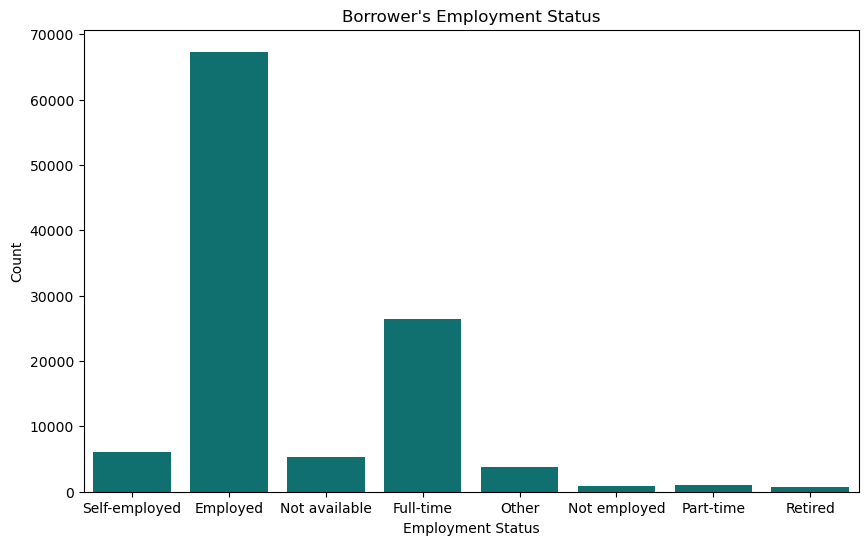

In [20]:
# Bar chart of the Borrower's Employment Status
plt.figure(figsize = [10, 6])
sns.countplot(data=df, x='employmentstatus', color='#008080')
plt.title("Borrower's Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count");

The bar chart shows employment status of the borrowers, which indicates that most of the borrowers are employed.

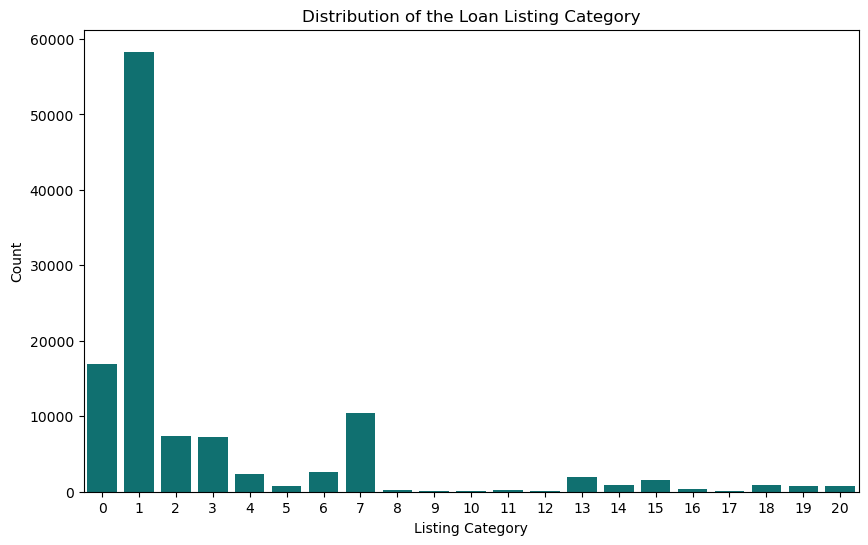

In [21]:
# Bar chart of the Listing Category for the loan
plt.figure(figsize = [10, 6])
sns.countplot(df["listingcategory_numeric"], color='#008080')
plt.title("Distribution of the Loan Listing Category")
plt.xlabel("Listing Category")
plt.ylabel("Count");

The bar chart shows the distribution of the listing categories. from our data, it shows that majority of the listing category are for listing number 1 which is Debt Consolidation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>-  The distribution of these variables, shows that the majority of the loans have a 36-month term. 
>-  Prosper rating numeric and prosper score showed a majority of a "4" rating. While, prosper rating alpha showed a "C" rating.
>-  The borrower's annual percentage rate (APR) and the debt-to-income (DTI) ratio indicates that some borrowers have high interest rates and high DTI ratios. 
>-  Majority of the borrowers are employed, and listed the loan for debt consolidation.

>-  From the distribution visualisations, there were no unusual points.  

>-  I changed all the columns headers to lowercase, removed all spaces, and close parentesis, and replaced all open parentesis with underscore to allow ease identification of the column names.
>- I also change the values in the home ownership column from True and False to Home Owner and Tenant respectively.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed a highly skewed distribution to the right in the DTI visualisation with majority of the values clustered towards the lower end of the scale.  

## Bivariate Exploration

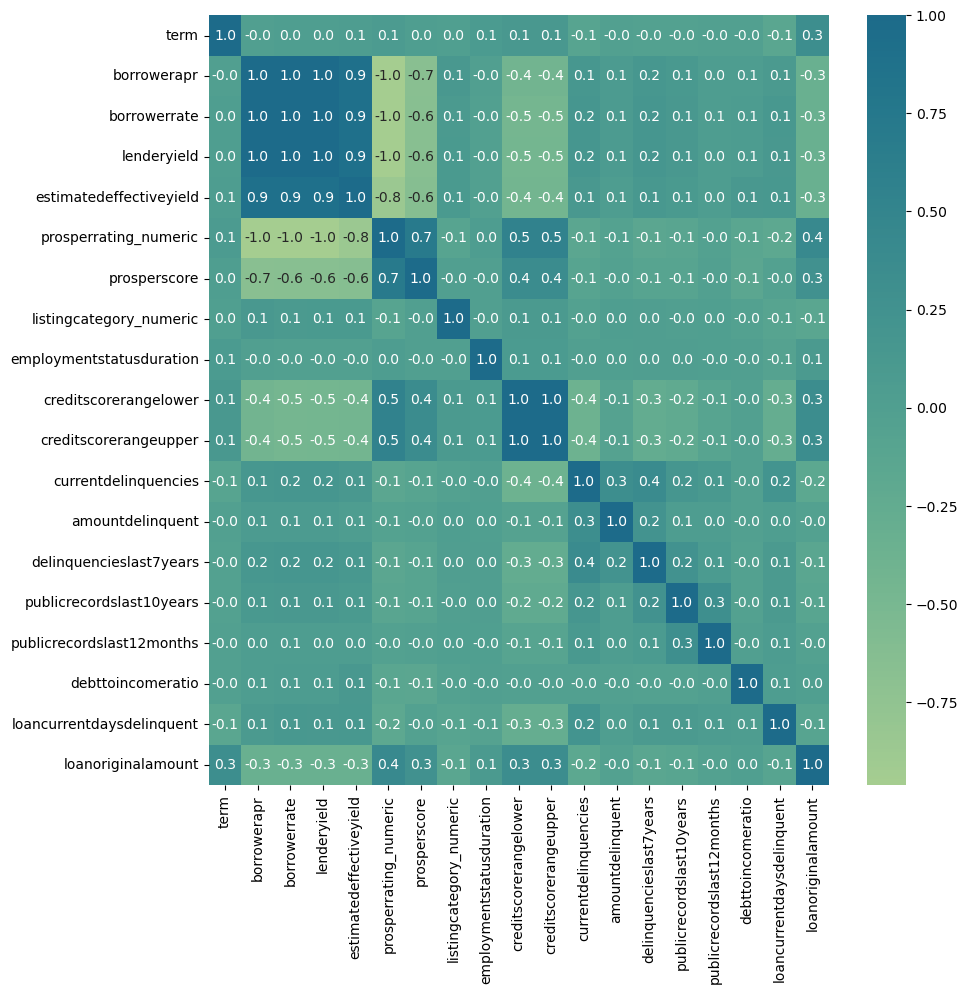

In [22]:
# Heatmap 
plt.figure(figsize = [10, 10])
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap="crest", center = 0.5);

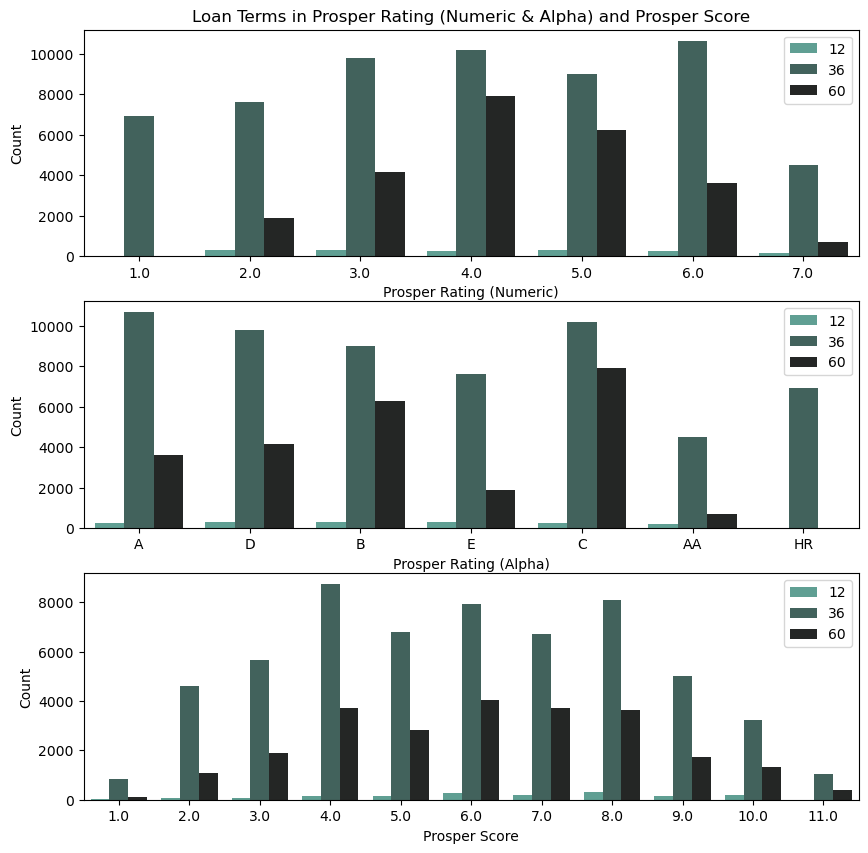

In [23]:
""" Clustered bar charts looking at relationship between the Loan Term 
and Prosper Rating (Numeric), Prosper Rating (Alpha) and Prosper Score """

plt.figure(figsize=[10,10])


plt.subplot(3,1,1)
sns.countplot(data=df, x='prosperrating_numeric', hue='term', palette="dark:#5A9_r")
plt.legend(loc=1)
plt.title("Loan Terms in Prosper Rating (Numeric & Alpha) and Prosper Score")
plt.xlabel("Prosper Rating (Numeric)")
plt.ylabel("Count")

plt.subplot(3,1,2)
sns.countplot(data=df, x='prosperrating_alpha', hue='term', palette="dark:#5A9_r")
plt.legend(loc=1)
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Count")

plt.subplot(3,1,3)
sns.countplot(data=df, x='prosperscore', hue='term', palette="dark:#5A9_r")
plt.legend(loc=1)
plt.xlabel("Prosper Score")
plt.ylabel("Count");

The clustered bar chart shows the distribution of loan terms (12 months, 36 months and 60 months) across different ratings/scores provided by Prosper.

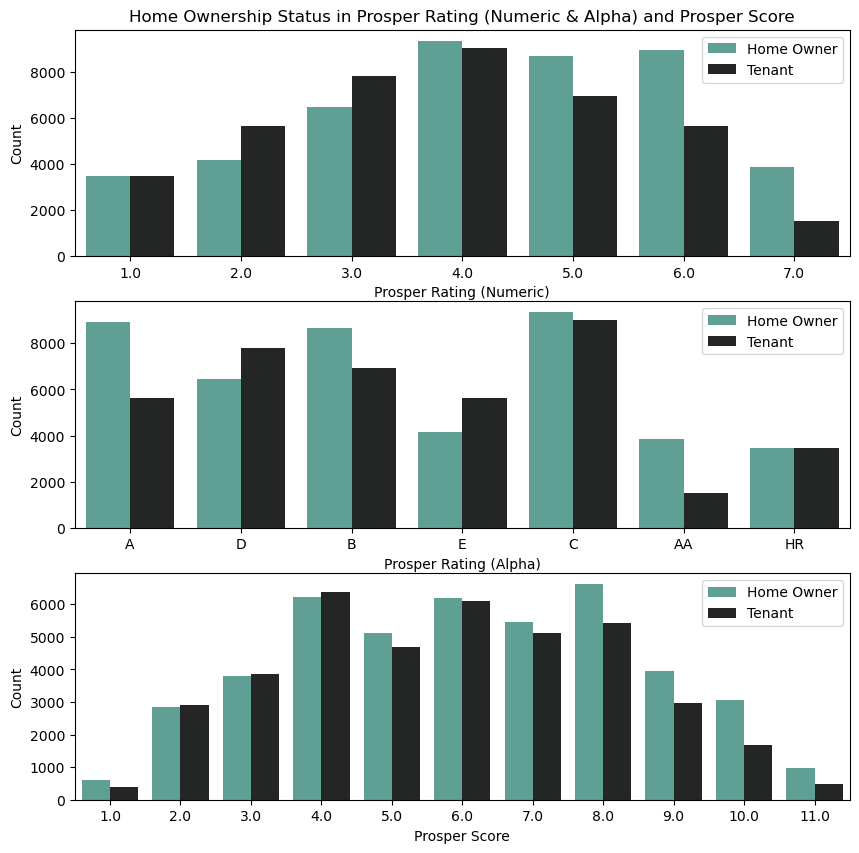

In [24]:
"""Clustered bar chart Home Ownership Status in 
Prosper Rating (Numeric), Prosper Rating (Alpha) and Prosper Score"""

plt.figure(figsize = [10, 10])

plt.subplot(3,1,1)
sns.countplot(data=df, x='prosperrating_numeric', hue='isborrowerhomeowner', palette='dark:#5A9_r')
plt.legend(loc=1)
plt.title("Home Ownership Status in Prosper Rating (Numeric & Alpha) and Prosper Score")
plt.xlabel("Prosper Rating (Numeric)")
plt.ylabel("Count")

plt.subplot(3,1,2)
sns.countplot(data=df, x='prosperrating_alpha', hue='isborrowerhomeowner', palette='dark:#5A9_r')
plt.legend(loc=1)
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Count")

plt.subplot(3,1,3)
sns.countplot(data=df, x='prosperscore', hue='isborrowerhomeowner', palette='dark:#5A9_r')
plt.legend(loc=1)
plt.xlabel("Prosper Score")
plt.ylabel("Count");

The clustered bar chart shows the distribution of home ownership status (homeowner or tenant) across different ratings/scores provided by Prosper.

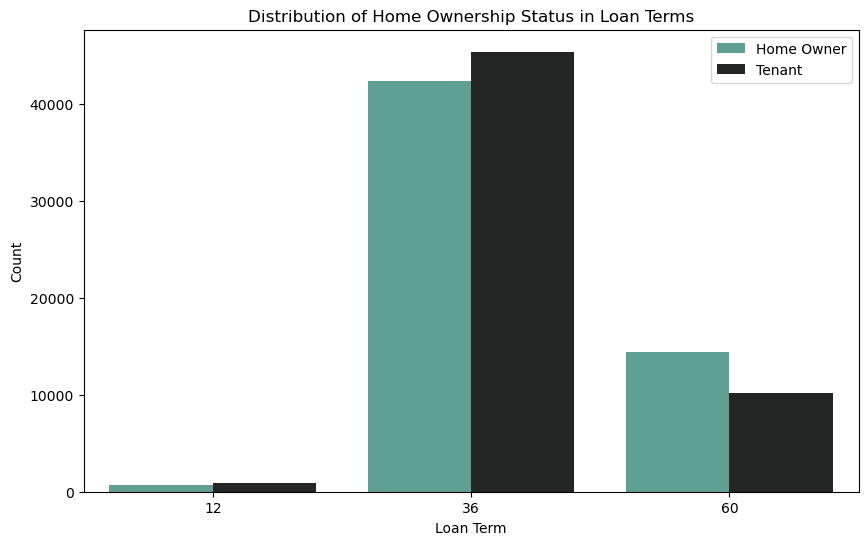

In [25]:
#Clustered bar chart of the distribution of Home Ownership Status in Loan Terms

plt.figure(figsize = [10, 6])
sns.countplot(data=df, x='term', hue='isborrowerhomeowner', palette='dark:#5A9_r')
plt.legend(loc=1)
plt.title("Distribution of Home Ownership Status in Loan Terms")
plt.xlabel("Loan Term")
plt.ylabel("Count");

The clustered bar chart shows the distribution of home ownership status across loan terms. 

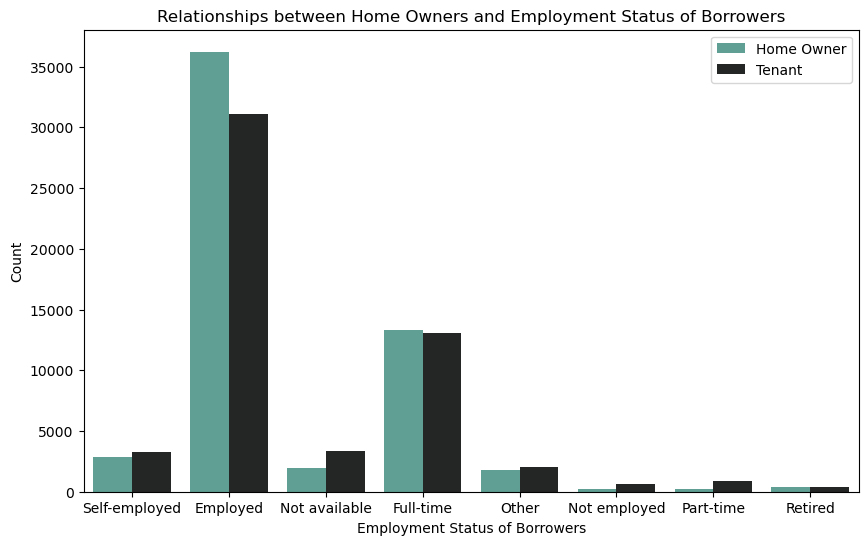

In [26]:
""" Clustered bar chart looking at relationship between Home Owners and  
Status of Employment of the borrowers' """

plt.figure(figsize = [10, 6])
sns.countplot(data=df, x='employmentstatus', hue='isborrowerhomeowner', palette='dark:#5A9_r')
plt.legend(loc=0)
plt.title("Relationships between Home Owners and Employment Status of Borrowers")
plt.xlabel("Employment Status of Borrowers")
plt.ylabel("Count");

The clustered shows the relationship between home ownership status and employment status of borrowers.

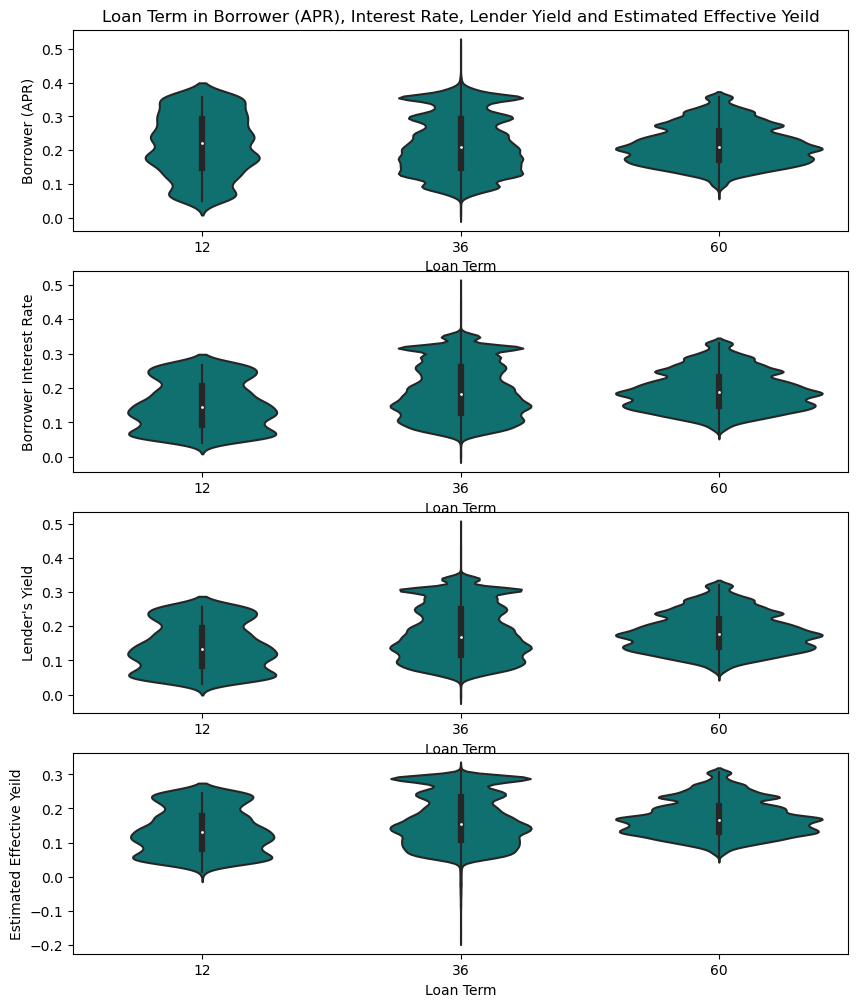

In [27]:
"""Violin plot of Loan Terms in Borrower's Annual Percentage Rate (APR), 
Borrower's Interest Rate, Lender's Yield and Estimated Effective Yeild"""

# Violin plot
plt.figure(figsize = [10, 12])
plt.subplot(4,1,1)
sns.violinplot(x="term", y="borrowerapr", color="teal", data=df)
plt.title("Loan Term in Borrower (APR), Interest Rate, Lender Yield and Estimated Effective Yeild")
plt.xlabel("Loan Term")
plt.ylabel("Borrower (APR)")

plt.subplot(4,1,2)
sns.violinplot(x="term", y="borrowerrate", color="teal", data=df)
plt.xlabel("Loan Term")
plt.ylabel("Borrower Interest Rate")

plt.subplot(4,1,3)
sns.violinplot(x="term", y="lenderyield", color="teal", data=df)
plt.xlabel("Loan Term")
plt.ylabel("Lender's Yield")

plt.subplot(4,1,4)
sns.violinplot(x="term", y="estimatedeffectiveyield", color="teal", data=df)
plt.xlabel("Loan Term")
plt.ylabel("Estimated Effective Yeild");


The violin plots show the distribution of Borrower APR, Borrower Interest Rate, Lender Yield, and Estimated Effective Yield across loan terms.

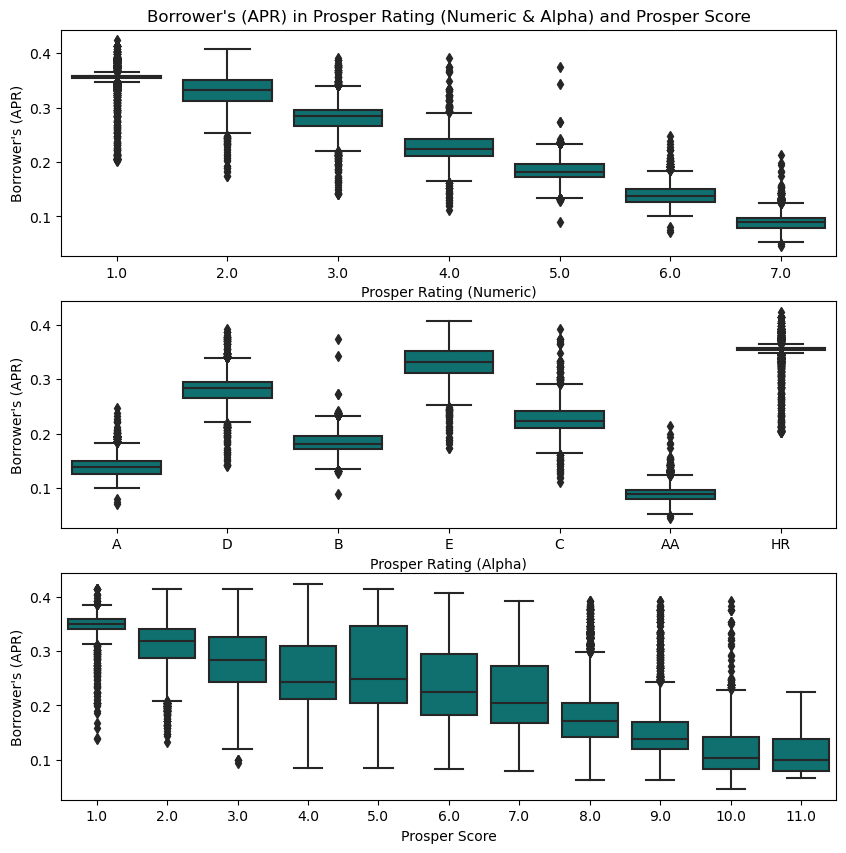

In [28]:
""" Box plot showing the Borrower's Annual Percentage Rate (APR) in 
Prosper Rating (Numeric), Prosper Rating (Alpha) and Prosper Score"""

plt.figure(figsize = [10, 10])
plt.subplot(3,1,1)
sns.boxplot(x="prosperrating_numeric", y="borrowerapr", color="teal", data=df)
plt.title("Borrower's (APR) in Prosper Rating (Numeric & Alpha) and Prosper Score")
plt.xlabel("Prosper Rating (Numeric)")
plt.ylabel("Borrower's (APR)")

plt.subplot(3,1,2)
sns.boxplot(x="prosperrating_alpha", y="borrowerapr", color="teal", data=df)
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Borrower's (APR)")

plt.subplot(3,1,3)
sns.boxplot(x="prosperscore", y="borrowerapr", color="teal", data=df)
plt.xlabel("Prosper Score")
plt.ylabel("Borrower's (APR)");

The box plots show the distribution of Borrower APR across different ratings/scores provided by Prosper.

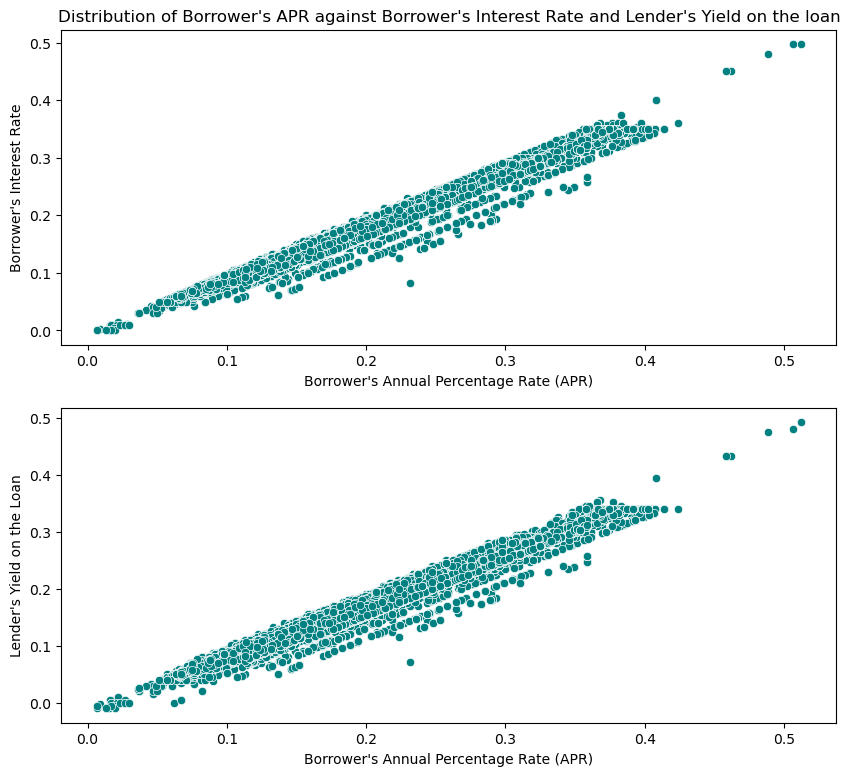

In [29]:
""" Scatter plots looking at Borrower's Annual Percentage Rate (APR) against 
Borrower's Interest Rate and Lender's Yield on the loan"""

plt.figure(figsize=[10,9])


plt.subplot(2,1,1)
sns.scatterplot(x="borrowerapr", y="borrowerrate", color="teal", data=df)
plt.title("Distribution of Borrower's APR against Borrower's Interest Rate and Lender's Yield on the loan")
plt.xlabel("Borrower's Annual Percentage Rate (APR)")
plt.ylabel("Borrower's Interest Rate");

plt.subplot(2,1,2)
sns.scatterplot(x="borrowerapr", y="lenderyield", color="teal", data=df)
plt.xlabel("Borrower's Annual Percentage Rate (APR)")
plt.ylabel("Lender's Yield on the Loan");

The Scatter plots show the distribution of the borrower's APR against the borrower's interest rate, and the lender's yield on the loan. The plot show a positive correlation between the borrower's APR and both the borrower's interest rate, and the lender's yield on the loan.

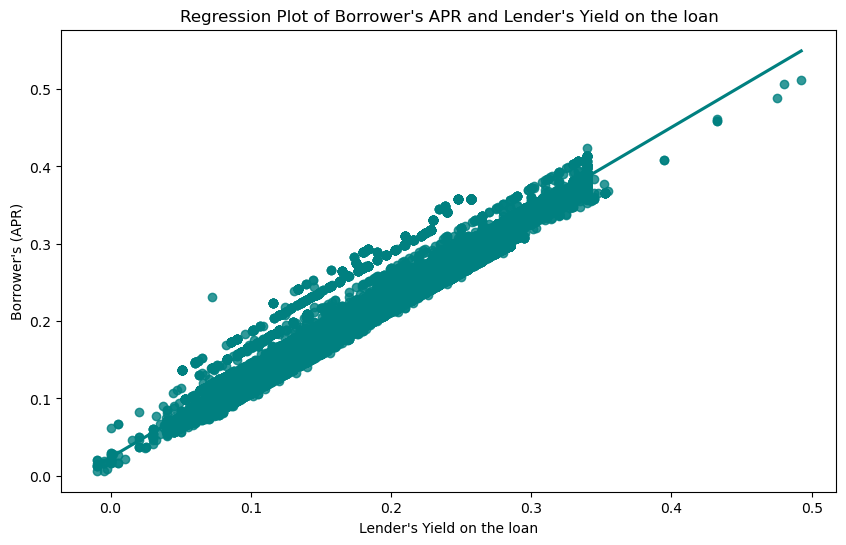

In [30]:
# Regression plot of Borrower's APR and Lender's Yield on the loan

plt.figure(figsize = [10, 6])
sns.regplot(x="lenderyield", y="borrowerapr", color="teal", data=df)
plt.title("Regression Plot of Borrower's APR and Lender's Yield on the loan")
plt.xlabel("Lender's Yield on the loan")
plt.ylabel("Borrower's (APR)");

In the regression plot shown above, the regression line is calculated between the lender's yield and the borrower's (APR). The regression line shows that there is a positive correlation between the two variables.

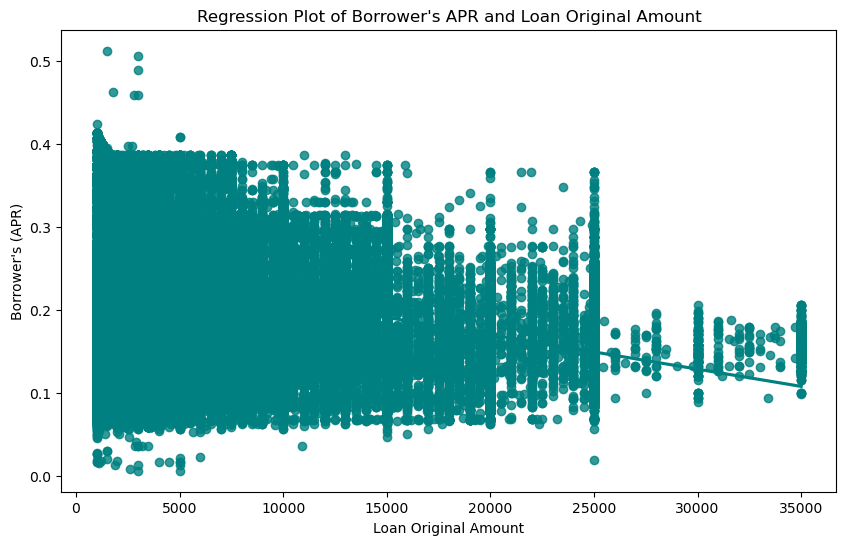

In [31]:
# Regression plot of Borrower's APR and Loan Original Amount

plt.figure(figsize = [10, 6])
sns.regplot(x = 'loanoriginalamount', y = 'borrowerapr',  color="teal", data=df);
plt.title("Regression Plot of Borrower's APR and Loan Original Amount")
plt.xlabel("Loan Original Amount")
plt.ylabel("Borrower's (APR)");

In the regression plot shown above, the regression line is calculated between the original loan amount and the borrower's (APR). The regression line shows that there is a negative correlation between the two variables.

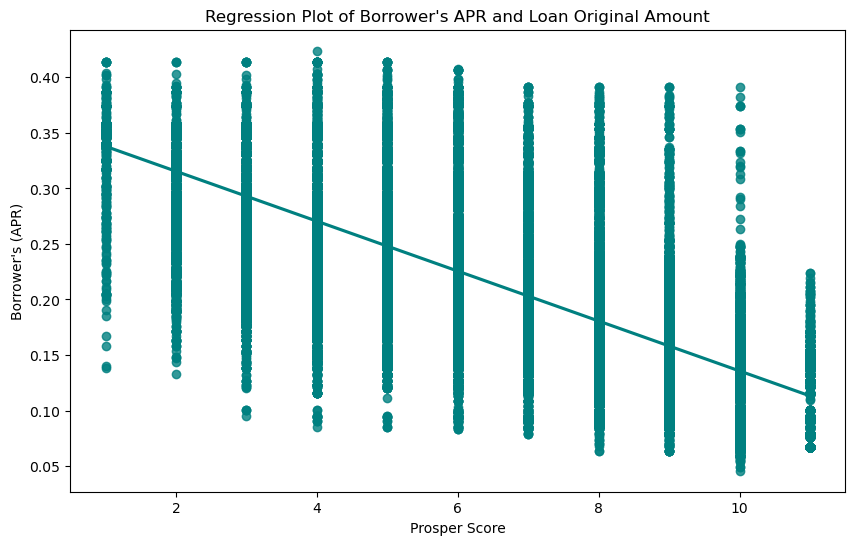

In [32]:
# Regression plot of Borrower's APR and Loan Original Amount

plt.figure(figsize = [10, 6])
sns.regplot(x = 'prosperscore', y = 'borrowerapr',  color="teal", data=df);
plt.title("Regression Plot of Borrower's APR and Loan Original Amount")
plt.xlabel("Prosper Score")
plt.ylabel("Borrower's (APR)");

In the regression plot shown above, the regression line is calculated between the prosper score and the borrower's (APR). The regression line shows that there is a negative correlation between the two variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>-  The majority of loans have a 36-month term.
>-  As the Prosper rating (numeric or alpha) or Prosper score increases, the number of loans with a 60-month term decreases.
>-  A higher proportion of borrowers who are homeowners have higher Prosper ratings and scores.
>-  The distribution of Borrower APR is relatively similar across loan terms.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>-  I noticed the following;
>-  The higher a borrower's rating, the more likely they are to be a homeowner.
>-  Among those who took out a 36-month loan, there were more tenants, while among those who took out a 60-month loan, there were more homeowners.
>-  Homeowners were more likely to be employed, self-employed, or have full-time employment, while tenants were more likely to be unemployed or have part-time employment.
>-  There is a positive correlation between a borrower's APR and their interest rate, meaning that as the APR increases, so does the interest rate.
>-  There is a positive correlation between a borrower's APR and the lender's yield, meaning that as the APR increases, so does the lender's yield.
>-  There is a negative correlation between the original loan amount and the borrower's APR, meaning that as the loan amount increases, the APR decreases.
>-  There is a negative correlation between the prosper score and the borrower's APR, meaning that as the prosper score increases, the APR decreases.

## Conclusions
> Based on the visualizations, it can be concluded that Prosper Loans have borrowers with a majority of "4" ratings in the Prosper Rating Numeric and Prosper Score, and a "C" rating in the Prosper Rating Alpha, with most borrowers taking out a 36-month loan term. Most of the borrowers listed the loan catgory as debt consolidation, while homeownership is more likely for borrowers with higher ratings and those who took out a 60-month loan. Also, employed borrowers are more likely to be homeowners than unemployed or part-time employment. Furthermore, there is a positive correlation between borrower's annual percentage rate (APR) and the interest rate and lender's yield, while there is a negative correlation between the loan amount and APR, and prosper score and APR, which can provide valuable insights to help lenders make informed decisions and manage loan portfolios effectively.
